根据比电容的定义，我们有
$$C_p=\frac{Q}{mV}=\frac{I\Delta t}{m\Delta V} \tag{1}$$
上下同时除以$\Delta t$可以得到
$$C_p=\frac{I}{m(\frac{\Delta V}{\Delta t})} \tag{2}$$
记扫描速率$k=\frac{\Delta V}{\Delta t}$，可以得到
$$C_p=\frac{I}{mk}\tag{3}$$
即
$$I=mkC_p\tag{4}$$
考虑CV曲线从$V_1$到$V_2$的单调过程
$$\int_{V_1}^{V_2}I(V)dV=\int_{V_1}^{V_2}mkC_pdV\tag{5}$$
$m,k,C_p$均为常数，因此
$$\int_{V_1}^{V_2}I(V)dV=(V_2-V_1)mkC_p\tag{6}$$
我们假设$V_2>V_1$。在CV曲线的充电过程中，
$$\int_{V_1}^{V_2}I_{up}(V)dV=(V_2-V_1)mkC_p\tag{7}$$
在放电过程中，
$$\int_{V_2}^{V_1}I_{down}(V)dV=(V_1-V_2)mkC_p\tag{8}$$
因此
$$C_p=\frac{Area}{2(V_2-V_1)mk}\tag{9}$$
其中$Area$是CV曲线围成的面积，用多边形的面积来近似。

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 将画图部分的字体统一为Arial
from matplotlib import rcParams
config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False #解决负号无法显示的问题
}
rcParams.update(config)

# 假设每次循环的电压窗口为a ~ b，则要求电压扫描为b → a → b → a → ··· → b
# 第一个循环的数据不采用

# 每次运行前更改
# m为活性物质的质量，单位为mg
# k为CV扫描的速率，单位为mV/s

m = 3.43
k = 1

coordinates = []

# 读取文件内数据
with open('CV.txt', 'r') as file:
    for i in range(2):
        line = file.readline().strip()
        parts = line.split(',')
        
        # 确保每行有两个值
        if len(parts) == 2:
            try:
                V = float(parts[0])
                I = float(parts[1])
                
                # 如果是第一行
                if i == 0:
                    first_V = V
                    first_I = I
                # 如果是第二行
                elif i == 1:
                    second_V = V
                    second_I = I
            except ValueError:
                print(f"无法解析行：{line}")
        if first_V is not None and second_V is not None:
            if first_V >= second_V:
                DST = 1
            else:
                DST = 0
    file.seek(0)
    for line in file:
        # 移除行末的换行符并使用逗号分隔符分割行
        parts = line.strip().split(',')
        
        # 确保行包含两个值
        if len(parts) == 2:
            # 将两个值转换为浮点数，并创建坐标点
            try:
                V = float(parts[0])
                I = float(parts[1])
                if DST == 0:
                   V = np.negative(V)
                   I = np.negative(I)
                coordinate = (V, I)
                coordinates.append(coordinate)
            except ValueError:
                print(f"无法解析行：{line}")

# 定义函数，以计算多边形围成的面积
def calculate_polygon_area(coords):
    n = len(coords)
    area = 0

    j = n - 1
    for i in range(0, n):
        area += (coords[j][0] + coords[i][0]) * (coords[j][1] - coords[i][1])
        j = i

    return abs(area / 2)

# coordinates列表包含了每一个坐标(V,I)
# 获取V坐标的最大值
max_first_coordinate = max(coordinates, key=lambda x: x[0])

# 获取所有最大值的索引
max_first_coordinate_indices = [i for i, coord in enumerate(coordinates) if coord[0] == max_first_coordinate[0]]
# 如果最大值只存在两个，而且索引列表长度为2
if len(max_first_coordinate_indices) == 2:
    # 复制 coordinates 的第一项并添加到末尾
    coordinates.append(coordinates[0][:])
    max_first_coordinate_indices = [i for i, coord in enumerate(coordinates) if coord[0] == max_first_coordinate[0]]


# 创建一个空列表来存储每个索引范围内的坐标
coordinate_ranges = []

# 使用循环获取每两个索引之间的坐标
for i in range(len(max_first_coordinate_indices) - 1):
    start_index = max_first_coordinate_indices[i]
    end_index = max_first_coordinate_indices[i + 1]
    
    # 使用切片提取坐标并存储在一个变量中
    selected_coordinates = coordinates[start_index:end_index]
    
    # 将坐标添加到列表中
    coordinate_ranges.append(selected_coordinates)

#建立一个数组，储存每一个循环的面积
areas = []

# 计算每个循环的面积
for i, coordinates_range in enumerate(coordinate_ranges):
    area = calculate_polygon_area(coordinates_range)
    areas.append(area)

areas = areas[1:]
# 计算循环面积的平均值
final_area = sum(areas)/len(areas)

V_values = [coord[0] for coord in coordinates]
delta_V = max(V_values) - min(V_values)

Cp = final_area * (10**6) /(2 * delta_V * m * k)
print("Area:", final_area)
print("比电容Cp=", Cp, "F/g")

# 将第二个循环的数据绘制成折线图
x_coordinates, y_coordinates = zip(*coordinate_ranges[2])

# 创建折线图
y00 = [i * 1000 for i in y_coordinates]
plt.plot(x_coordinates, y00)


# 添加标签和标题
plt.xlabel('Potential/V')
plt.ylabel('Current/mA')
plt.title('CV curve')

# 不显示网格
plt.grid(False)

# 保存为矢量图
plt.savefig("test.eps", dpi=600,format="eps")

# 显示预览图形
plt.show()

print(areas)


Area: 0.0006286618890999982
比电容Cp= 101.82408310657567 F/g


IndexError: list index out of range

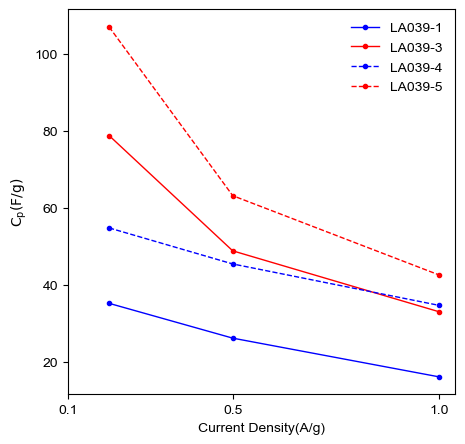

In [28]:
a1=[35.29, 26.26, 16.23]
a2=[78.81, 48.90, 33.12]
a3=[54.85, 45.50, 34.77]
a4=[107.00, 63.21 ,42.67]
b=[0.2, 0.5, 1]

plt.figure(figsize=(5, 5))
plt.plot(b, a1,'b.-', linewidth=1)
plt.plot(b, a2,'r.-', linewidth=1)
plt.plot(b, a3,'b.--', linewidth=1)
plt.plot(b, a4,'r.--', linewidth=1)
plt.xlabel('Current Density(A/g)')
plt.ylabel('$\mathrm{C_p(F/g)}$')
plt.xticks([0.1, 0.5, 1.0])
plt.legend(['LA039-1', 'LA039-3', 'LA039-4', 'LA039-5'], frameon=False)
plt.title('')
# plt.text()
plt.savefig("compare.eps", dpi=600,format="eps")
plt.show()

In [45]:
with open('CV.txt', 'r') as file:
    # 读取前两行
    for i in range(2):
        line = file.readline().strip()
        parts = line.split(',')
        
        # 确保每行有两个值
        if len(parts) == 2:
            try:
                V = float(parts[0])
                I = float(parts[1])
                
                # 如果是第一行
                if i == 0:
                    first_V = V
                    first_I = I
                # 如果是第二行
                elif i == 1:
                    second_V = V
                    second_I = I
            except ValueError:
                print(f"无法解析行：{line}")

# 比较第一行和第二行的第一个值和第二个值
if first_V is not None and second_V is not None:
    if first_V >= second_V:
        print("第一行的第一个值大于等于第二行的第一个值")
    else:
        print("第一行的第一个值小于第二行的第一个值")
    
    if first_I >= second_I:
        print("第一行的第二个值大于等于第二行的第二个值")
    else:
        print("第一行的第二个值小于第二行的第二个值")

第一行的第一个值大于等于第二行的第一个值
第一行的第二个值大于等于第二行的第二个值
